# RTI International Python Code Snippets

These are some important pieces of code that I created in order to generate RTI's 2017 Synthetic Population from raw ACS data.

# Reading Tables In

In [ ]:
def read_and_send_all_tables(table_num):
    """ Reads and sends to sql one numbered table with all the states

    Parameters
    ----------
    table_num : int
        the table you want to read and send to database
    """
    statedf_list = []
    table_name = 'e' + str(table_num).zfill(4)

    # ----- Check if the table is in the database
    query = """
    SELECT EXISTS(SELECT 1 FROM information_schema.tables 
          WHERE table_schema='%s' AND 
                table_name='%s'); 
    """ % (SCHEMA, table_name)

    if engine_freyja.execute(query).fetchone()[0]:
        print(table_name + " already exists")
        return

    # ----- Otherwise, add the table
    for state_key, state_name in us_state_abbrev.items():
        tracts_directory = state_name + '_Tracts_Block_Groups_Only'
        if tracts_directory in os.listdir(Path(directory, "Tracts_Block_Groups_Only")):
            df = read_tables_by_state(state_key, table_num)[0]
            statedf_list.append(df)
        else:
            print('{} was not found.'.format(tracts_directory))
    together = pd.concat(statedf_list)

    try:
        together.to_sql(name=table_name, con=engine_freyja, if_exists='fail', index=False,
                        schema=SCHEMA, method=psql_insert_copy)
    except ValueError:
        print(table_name + " already exists")

# Creating Marginal Tables

In [ ]:
    create_hh_size = 
    """
    CREATE TABLE """ + SCHEMA + """.acs_household_size as
    SELECT e.logrecno as logrecno,
        gc.state as state, 
        gc.county as county, 
        gc.puma as puma, 
        gc.tract as tract, 
        gc.blkgrp as blkgrp, 
        e.b11016_001 as total,
        e.b11016_010 as "1",
        e.b11016_003 + e.b11016_011 as "2", 
        e.b11016_004 + e.b11016_012 as "3",
        e.b11016_005 + e.b11016_013 as "4",
        e.b11016_006 + e.b11016_014 as "5", 
        e.b11016_007 + e.b11016_015 as "6",
        e.b11016_008 + e.b11016_016 as "7+"
    FROM """ + SCHEMA + """.e0037 as e, 
        """ + SCHEMA + """.g as g,
        """ + SCHEMA + """.""" + GEO_CORR + """ as gc 
    WHERE g.county = gc.county
        and g.blkgrp = gc.blkgrp
        and g.tract = gc.tract 
        and upper(g.stusab) = upper(e.stusab) 
        and gc.state = g.state 
        and e.logrecno = g.logrecno 
        and g.tract > 0   and e.b11016_001 > 0 
        and g.sumlevel = '150' order by gc.state,gc.county,gc.tract;
    """

# Iterative Proportional Fitting Implementation

In [1]:
# ----- Run the IPF on each combination of block group and variables ----
# Then...
# ----- Create an DataFrame of the numpy indices
    df_template = pd.DataFrame(indices).T
    # --- Add the column names
    df_template.columns = a_variable_list
    # --- Repeat for each block group and concatenate them together
    template_list = [df_template] * len(log_rec_values)
    df_big = pd.concat(template_list)

    # ----- Add in totals to each index combination
    values_list = []
    for q in range(len(log_rec_values)):
        entry1 = ipf_dict[log_rec_values[q]]
        values_list.append(entry1.flatten())
    values = np.vstack(values_list).flatten()
    df_big["counts"] = values
    
     # ---- Expand to one row per household
    count1 = 0
    temp_array = np.zeros((int(df_big['counts'].sum()), len(a_variable_list) + 1))

    for i, row in enumerate(v):
        count2 = count1 + row[-1]
        for j in range(len(row[:-1])):
            temp_array[:, j][count1:count2] = row[j]
        count1 = count2

NameError: name 'np' is not defined

# Joining Records with Criteria by PUMA

In [3]:

# for every puma and for every group in each puma
    # THEN...
        # ... Merge the Synth Pop and PUMS DFs together with this function
def merge_synpop_with_pums(left_df, right_df):
"""
Parameters
----------
left_df : DataFrame
    The synthetic population data that needs to be matched
right_df : DataFrame
    The corresponding PUMS Data available for matching

Return
------
Merged DataFrame after sampling records from right DF based on `wgtp` variable
"""
weights = right_df["wgtp"]
weights /= sum(right_df.wgtp)
l1 = left_df.copy()
random_assignments = np.random.choice(np.arange(len(right_df)), len(l1), p=weights)
l1['serialno'] = [right_df['serialno'].values[item] for item in random_assignments]
return l1

# And produce a report, shown below:

NameError: name 'unique_pumas' is not defined

# Example of Report Generated:

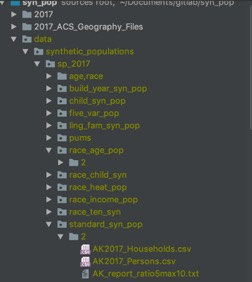

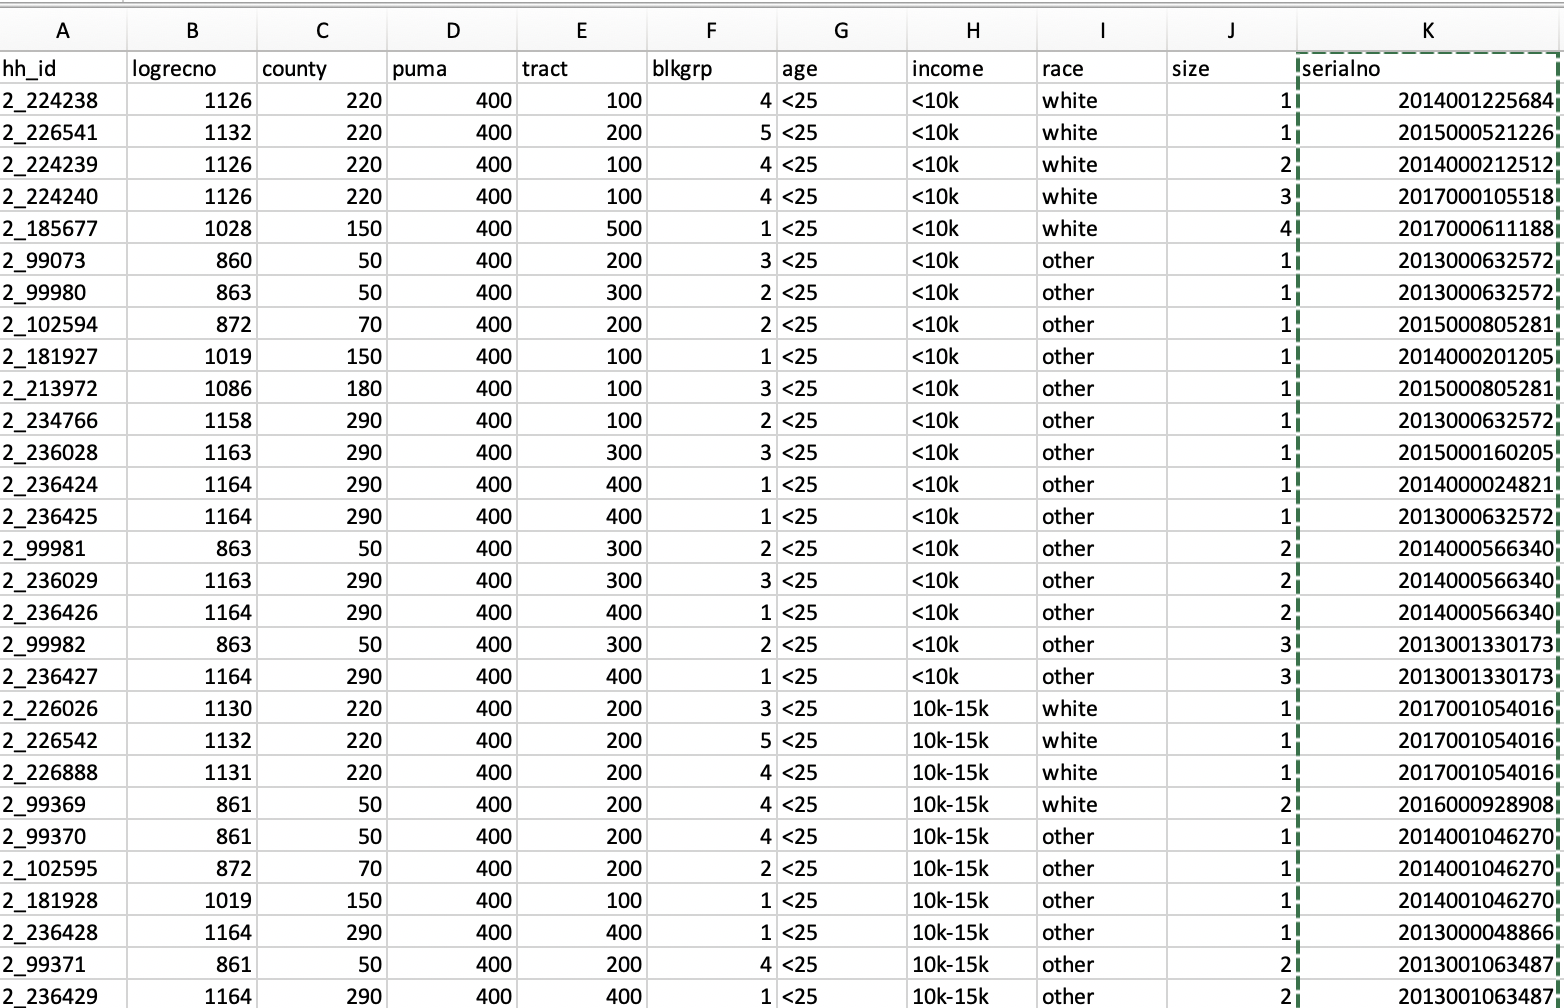